# Predicting Project Survival: Anticipating  need for project reorganization by implementing scikit-learn library to predict if a project at a given date will deviate from the projected completion date, or "survive"
Author: @leannmendoza

Source: https://medium.com/better-programming/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16

## 1. Feature Engineering: Determine preliminary features based on the variables variability based on survival (V3 score <= 25, or project actual end date +/- 5 days behind/early)
* Input file: proj_stat_detail_view, obtained from a tableau export of PPMO Jira Statistical PM Data. Contains project activity statistics collected at EOD for each project within its domain. See Statistical Project Management Articles by Vince Kellen (cutter.com)
* Labels: df[“survived”] = 0 and df[“survived”] = 1  

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Redacted info for github upload for confidentiality purposes
proj_stat_detail_view = ''
project_name_specific = '' #be sure to pick a project that is known to be completed
project_to_viz = ''

In [3]:
#Load the data
main_df = pd.read_csv(proj_stat_detail_view ,dtype=object)
main_df.columns = [c.replace(' ', '_') for c in main_df.columns]

In [4]:
#create df with only specific projects 'Project_Long_Name' data
project_df = main_df[main_df.Project_Long_Name == project_name_specific]
project_df = project_df.fillna(0)

In [5]:
#Count the number of rows and columns in the data set 
project_df.shape

(701, 159)

In [6]:
#Get a count of the number of "survived projects" to reference later
survived_project_df = project_df[pd.to_numeric(project_df['Project_Task_Date_Est_Act_V3']) <= 25]
survived_project_df.shape

(187, 159)

In [7]:
# Create def to create new row signifying if the project survived or not
def label_survived(row):
    if pd.to_numeric(row['Project_Task_Date_Est_Act_V3']) <= 25:
        return '1'
    return '0'

In [8]:
# apply label_survived function in pandas
project_df.apply (lambda row: label_survived(row), axis=1) # axis=1 specifier, that means that the application is done at a row, rather than a column level

48535    1
48536    1
48537    1
48538    1
48539    1
        ..
49231    0
49232    0
49233    0
49234    0
49235    0
Length: 701, dtype: object

In [9]:
# Save results in new column
project_df['survived'] = project_df.apply (lambda row: label_survived(row), axis=1)
project_df['survived'].value_counts() 

0    514
1    187
Name: survived, dtype: int64

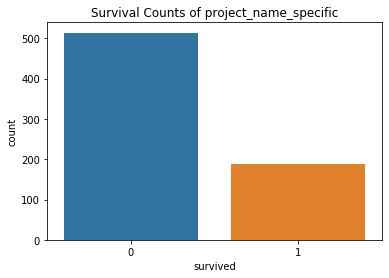

In [10]:
#Visualize the survival ratio
plt.title('Survival Counts of project_name_specific')
sns.countplot(project_df['survived'],label='Count')

['Number_of_Records', 'Project_Active_Discretionary_Flag', 'Project_Category', 'Project_Client_VC_Area', 'Project_Date_Created', 'Project_Description', 'Project_End_Date_Actual', 'Project_End_Date_Estimated', 'Project_Executive_Update', 'Project_Funding_Category', 'Project_Go_Live_Estimate', 'Project_Governance_Committee', 'Project_Health', 'Project_ID', 'Project_ITS_Group', 'Project_Jira_Link_to_ITS_PRO_Project', 'Project_Jira_Link_to_ITS_Portfolio', 'Project_Long_Name', 'Project_Manager_First_Name', 'Project_Manager_Full_Name', 'Project_Manager_ID', 'Project_Manager_Last_Name', 'Project_Milestone_Average_Duration', 'Project_Milestone_Average_Duration_Diff', 'Project_Milestone_Average_Duration_Z_Score', 'Project_Milestone_Average_Duration_Z_Score_Diff', 'Project_Milestone_Count', 'Project_Milestone_Count_Diff', 'Project_Milestone_Count_Z_Score', 'Project_Milestone_Count_Z_Score_Diff', 'Project_Milestone_Date_Change_V7', 'Project_Milestone_Date_Change_V7_Diff', 'Project_Milestone_Date_

/Users/l9mendoza/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/l9mendoza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/Users/l9mendoza/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


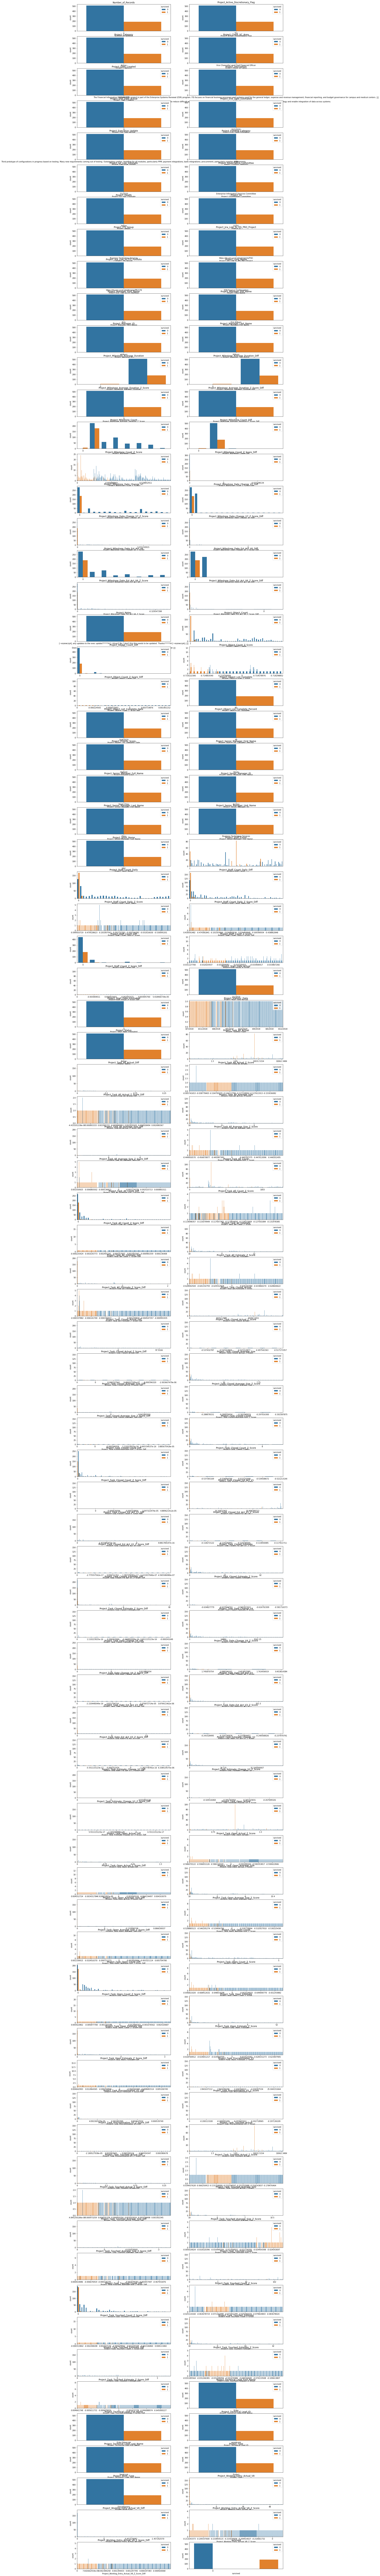

In [11]:
# Visualize the count of survivors (survived projects) over all columns
cols = list(project_df.columns) 
print(cols)

n_rows = 80
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*10,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(project_df[cols[i]], hue=project_df['survived'], ax=ax)
        ax.set_xticks(ax.get_xticks()[::100])
        ax.set_title(cols[i])
        ax.legend(title='survived', loc='upper right') 
        
plt.tight_layout()   #tight_layout - prevents overlapping
plt.savefig('feature_figs.png')

### After visualizing all possible features, we narrowed the features we are interested in down to;
* 'Project_Milestone_Count': observed higher amount survival at lower project milestone count
* 'Project_Object_Count': observed higher amount survival at lower project object count
* 'Project_Staff_Count': observed higher amount survival at lower project staff count
* 'Project_Task_All_Average_Size': observed higher amount survival at lower project avg task size, some sweet spots
* 'Project_Task_Date_Est_Act_V3': observed survival at lower V3

### Let's visualize these trends throughout different projects 

In [12]:
#create df with only project_to_viz data, change dtypes to numeric/datetime and decribe
project_to_viz_df = main_df[main_df.Project_Long_Name == project_to_viz]
project_to_viz_df = project_to_viz_df[['Project_Milestone_Count','Project_Object_Count','Project_Staff_Count','Project_Statistic_Date', 'Project_Task_All_Average_Size','Project_Task_Date_Est_Act_V3']].copy()
project_to_viz_df[['Project_Milestone_Count','Project_Object_Count', 'Project_Staff_Count','Project_Task_All_Average_Size','Project_Task_Date_Est_Act_V3']] = project_to_viz_df[['Project_Milestone_Count','Project_Object_Count', 'Project_Staff_Count','Project_Task_All_Average_Size','Project_Task_Date_Est_Act_V3']].apply(pd.to_numeric)
project_to_viz_df[['Project_Statistic_Date']].apply(pd.to_datetime)
project_to_viz_df = project_to_viz_df.fillna(0)

project_to_viz_df.describe()

,Project_Milestone_Count,Project_Object_Count,Project_Staff_Count,Project_Task_All_Average_Size,Project_Task_Date_Est_Act_V3
count,701.000000,701.000000,701.000000,701.000000,701.000000
mean,4.462197,410.507846,65.981455,6.671023,3102.338764
std,3.680498,600.742299,54.697124,3.146003,4635.129425
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,7.000000,3.425752,1.000000
50%,2.000000,32.000000,76.000000,6.000000,469.949552
75%,7.000000,1284.000000,115.000000,9.461538,9958.760821
max,13.000000,1582.000000,145.000000,17.093750,11563.481488


In [13]:
# Apply label_survived fxn and save results in new column
project_to_viz_df['survived'] = project_to_viz_df.apply (lambda row: label_survived(row), axis=1)

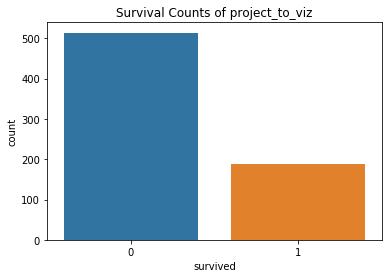

In [14]:
#Visualize the count of number of survivors
plt.title('Survival Counts of project_to_viz')
sns.countplot(project_to_viz_df['survived'],label='Count')

['Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3', 'Project_Statistic_Date']


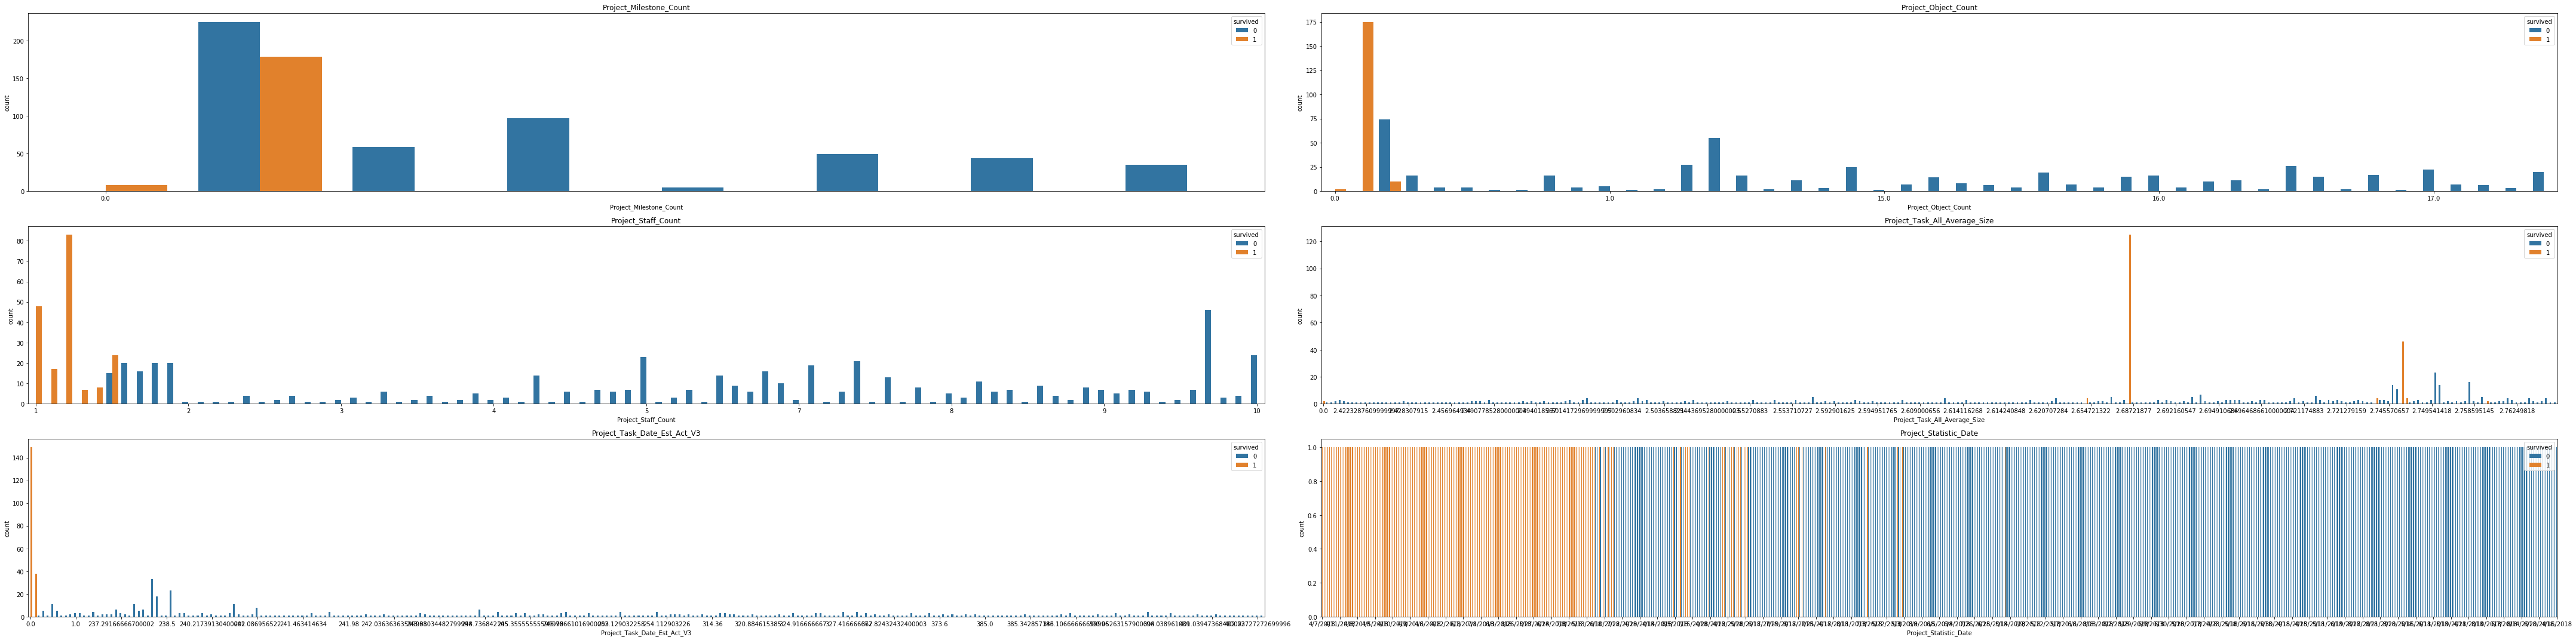

In [15]:
'''
Visualize the count of survivors for columns 'Project_Milestone_Count', 'Project_Object_Count',
'Project_Staff_Count', 'Project_Task_All_Average_Size','Project_Task_Date_Est_Act_V3', 'Project_Statistic_Date'
'''
cols = ['Project_Milestone_Count', 'Project_Object_Count','Project_Staff_Count', 'Project_Task_All_Average_Size',
        'Project_Task_Date_Est_Act_V3', 'Project_Statistic_Date']
print(cols)

n_rows = 3
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
#fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*30,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(project_to_viz_df[cols[i]], hue=project_to_viz_df['survived'], ax=ax)
        ax.set_xticks(ax.get_xticks()[::10])
        ax.set_title(cols[i])
        ax.legend(title='survived', loc='upper right') 
        
        
        
plt.tight_layout()   #tight_layout - prevents overlapping
plt.savefig('project_to_viz_feature_figs.png')

## 2. Preprocessing: Clean date for input into machine learning models to predict “survival”  (V3 score <= 25, or project actual end date +/- 5 days behind/early)
* Combine all projects and create df to run through ML Models


In [16]:
# Prepare dataset for model input
print('Before dropping null values in feature columns in main_df: ', main_df.shape)
main_df = main_df.dropna(subset=['Project_Long_Name','Project_Statistic_Date','Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3'])
print('After dropping null values in feature columns in main_df: ', main_df.shape)

model_df = main_df # option for isolating specific projects ex) model_df = main_df[(main_df.Project_Long_Name == 'XXX')] 

# Feature Isolation: features are predetermined from previous statisical analysis as relevant to survival 
model_df = model_df[['Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3']].copy() 
print('After dropping non-feaure columns in model_df: ', model_df.shape)
model_df = model_df.apply(pd.to_numeric) # convert all columns of DataFrame to numerical value
model_df.describe()

Before dropping null values in feature columns in main_df:  (136921, 159)
After dropping null values in feature columns in main_df:  (39473, 159)
After dropping non-feaure columns in model_df:  (39473, 5)


,Project_Milestone_Count,Project_Object_Count,Project_Staff_Count,Project_Task_All_Average_Size,Project_Task_Date_Est_Act_V3
count,39473.000000,39473.000000,39473.000000,39473.000000,3.947300e+04
mean,9.286094,48.234895,20.490766,15.288452,1.782626e+04
std,11.996313,127.329721,22.241152,17.713449,8.015998e+04
min,1.000000,1.000000,1.000000,0.945370,0.000000e+00
25%,2.000000,11.000000,7.000000,7.978723,7.588906e+02
50%,7.000000,24.000000,14.000000,12.620690,2.661904e+03
75%,12.000000,52.000000,24.000000,17.150000,7.389409e+03
max,108.000000,1582.000000,145.000000,332.500000,1.037229e+06


In [17]:
# Create separate dataframe to save identifying info: project name at each statisitic date, to be used for merging predictions
id_df = main_df[['Project_Long_Name','Project_Statistic_Date','Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3']].copy()
print('id_df (should be 2 more columns than model_df): ', id_df.shape)

id_df (should be 2 more columns than model_df):  (39473, 7)


0    38805
1      668
Name: survived, dtype: int64


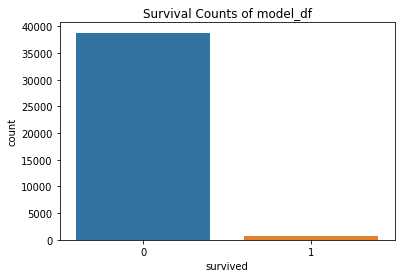

In [18]:
# Apply label survived fxn and ave results in new column
model_df['survived'] = model_df.apply (lambda row: label_survived(row), axis=1)
print(model_df['survived'].value_counts())

#Visualize the count of number of survivors
plt.title('Survival Counts of model_df')
sns.countplot(model_df['survived'],label='Count')

['Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3', 'survived']


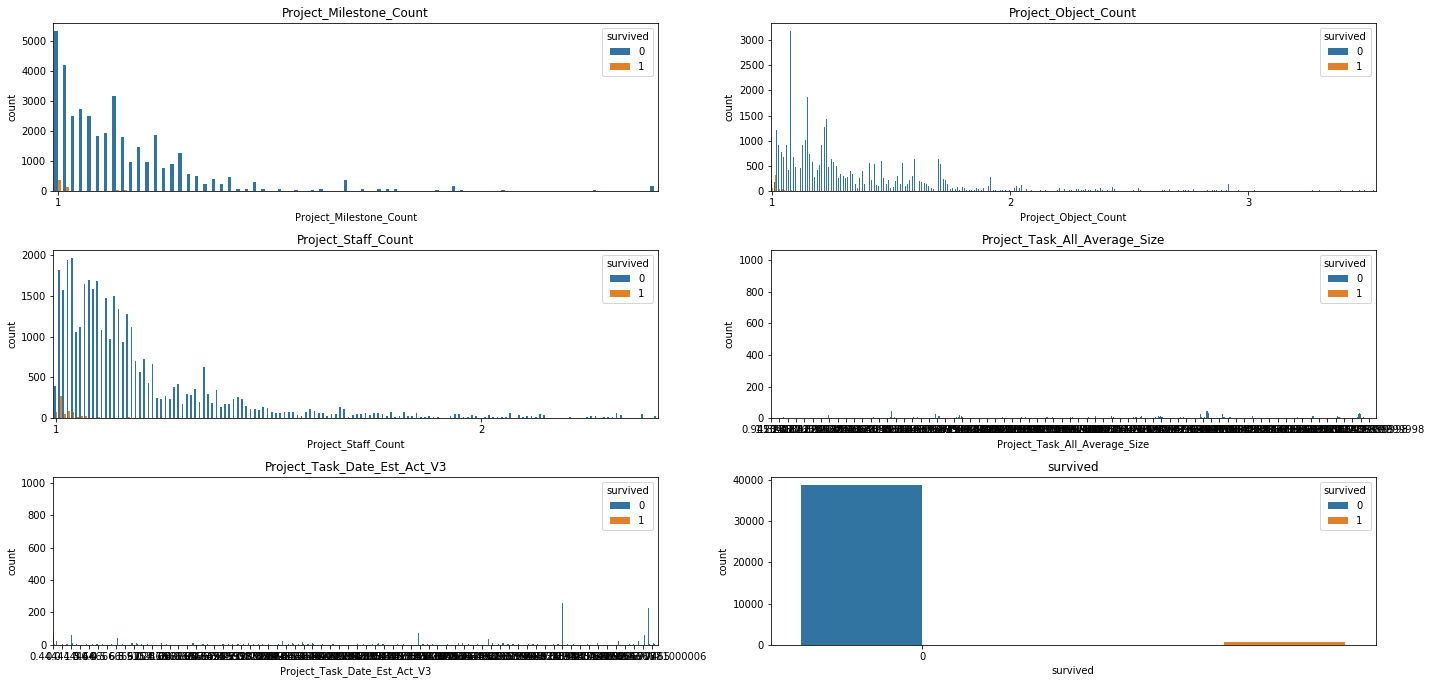

In [19]:
# Visualize the count of survivors for columns 
cols = list(model_df.columns) 
print(cols)

n_rows = 3
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
#fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*10,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(model_df[cols[i]], hue=model_df["survived"], ax=ax)
        ax.set_xticks(ax.get_xticks()[::100])
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout - prevents overlapping
plt.savefig('model_feature_figs.png')

In [20]:
# Sanity check count of empty (NaN, NAN, na) values in each column 
model_df.isna().sum()

Project_Milestone_Count          0
Project_Object_Count             0
Project_Staff_Count              0
Project_Task_All_Average_Size    0
Project_Task_Date_Est_Act_V3     0
survived                         0
dtype: int64

In [21]:
# Move survived column as first column for input into scikit-learn models
mid = model_df['survived']
model_df.drop(labels=['survived'], axis=1,inplace = True)
model_df.insert(0, 'survived', mid)
list(model_df.columns)

['survived',
 'Project_Milestone_Count',
 'Project_Object_Count',
 'Project_Staff_Count',
 'Project_Task_All_Average_Size',
 'Project_Task_Date_Est_Act_V3']

In [22]:
# Split the data into independent 'X' and dependent 'Y' variables
X = model_df.iloc[:, 1:8].values #features
Y = model_df.iloc[:, 0].values #survived 0/1

In [23]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
original_X_test = X_test # save original values to reference for predictions

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3. Training Model: Run dataset through scikit-learn models, determine accuracy of each model to predict “survival” 
* Features (attributes we have predicted affect the survival outcome): Project Milestone Average Duration,  Project Milestone Count, Project Object Count, Project Staff Count, Project Task All Average Size, Project Statistic Date
* Labels: df[“survived”] = 0 and df[“survived”] = 1  
* Train on skl Logistic Regression, K-nearest neighbor, Linear classifier SVM, RBF classifier SVM, Gaussian Naive Bayes, Decision Tree, Random Forest Classifier Models and evaluate accuracy

In [25]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0,max_iter = 2000)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [26]:
#Get and train all of the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9829944898346951
[1]K Nearest Neighbor Training Accuracy: 0.999429982899487
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9829944898346951
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9829944898346951
[4]Gaussian Naive Bayes Training Accuracy: 0.992811451010197
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 1.0


## 4. Testing Models: Predict “survival” using independant test set 

In [27]:
# Save predictions in a dictionary
from sklearn import metrics
log, knn, svc_lin, svc_rbf, gauss, tree, forest = model
ml_models = [log, knn, svc_lin, svc_rbf, gauss, tree, forest]
predictions = {} 
predictions['log'] = (log.predict(X_test), metrics.accuracy_score(Y_test, log.predict(X_test)))
predictions['knn'] = (knn.predict(X_test), metrics.accuracy_score(Y_test, knn.predict(X_test)))
predictions['svc_lin'] = (svc_lin.predict(X_test), metrics.accuracy_score(Y_test, svc_lin.predict(X_test)))
predictions['svc_rbf'] = (svc_rbf.predict(X_test), metrics.accuracy_score(Y_test, svc_rbf.predict(X_test)))
predictions['gauss'] = (gauss.predict(X_test), metrics.accuracy_score(Y_test, gauss.predict(X_test)))
predictions['tree'] = (tree.predict(X_test), metrics.accuracy_score(Y_test, tree.predict(X_test)))
predictions['forest'] = (forest.predict(X_test), metrics.accuracy_score(Y_test, forest.predict(X_test)))

In [28]:
results = pd.DataFrame({'actual': list(Y_test),
                        'log': list(predictions['log'][0]), 
                        'knn': list(predictions['knn'][0]), 
                        'svc_lin': list(predictions['svc_lin'][0]), 
                        'svc_rbf': list(predictions['svc_rbf'][0]), 
                        'gauss': list(predictions['gauss'][0]), 
                        'tree': list(predictions['tree'][0]), 
                        'forest': list(predictions['forest'][0]) }, 
                        columns=['actual','log', 'knn', 'svc_lin', 'svc_rbf', 'gauss', 'tree', 'forest'])
results['Project_Milestone_Count'], results['Project_Object_Count'], results['Project_Staff_Count'], results['Project_Task_All_Average_Size'], results['Project_Task_Date_Est_Act_V3'] = zip(*list(original_X_test))
results

,actual,log,knn,svc_lin,svc_rbf,gauss,tree,forest,Project_Milestone_Count,Project_Object_Count,Project_Staff_Count,Project_Task_All_Average_Size,Project_Task_Date_Est_Act_V3
0,0,0,0,0,0,0,0,0,13.0,62.0,14.0,6.170896,1654.719745
1,0,0,0,0,0,0,0,0,2.0,61.0,32.0,18.136730,6800.713376
2,0,0,0,0,0,0,0,0,8.0,22.0,9.0,7.768657,4165.806452
3,0,0,0,0,0,0,0,0,5.0,72.0,12.0,8.278195,1281.733333
4,0,0,0,0,0,0,0,0,4.0,7.0,5.0,11.111111,664.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,0,0,0,0,0,0,0,0,8.0,21.0,11.0,7.513333,10879.071429
7891,0,0,0,0,0,0,0,0,4.0,137.0,61.0,14.981935,2849.136564
7892,0,0,0,0,0,0,0,0,4.0,15.0,11.0,15.805556,24262.444444
7893,0,0,0,0,0,0,0,0,8.0,14.0,11.0,26.853659,6268.739130


In [29]:
#print model accuracy on the testing data.
print('[0]Logistic Regression Training Accuracy:', log.score(X_test, Y_test))
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_test, Y_test))
print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_test, Y_test))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_test, Y_test))
print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_test, Y_test))
print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_test, Y_test))
print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_test, Y_test))

[0]Logistic Regression Training Accuracy: 0.9834072197593413
[1]K Nearest Neighbor Training Accuracy: 0.9992400253324889
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9834072197593413
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9834072197593413
[4]Gaussian Naive Bayes Training Accuracy: 0.9907536415452818
[5]Decision Tree Classifier Training Accuracy: 0.9998733375554149
[6]Random Forest Classifier Training Accuracy: 0.9998733375554149


In [30]:
id_df[['Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3']] = id_df[['Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3']].apply(pd.to_numeric)
merged_df = results.merge(id_df, how = 'inner', on = ['Project_Milestone_Count', 'Project_Object_Count', 'Project_Staff_Count', 'Project_Task_All_Average_Size', 'Project_Task_Date_Est_Act_V3'])
merged_df = merged_df.drop_duplicates()
del merged_df['Project_Long_Name'] # for confidentiality
merged_df


,actual,log,knn,svc_lin,svc_rbf,gauss,tree,forest,Project_Milestone_Count,Project_Object_Count,Project_Staff_Count,Project_Task_All_Average_Size,Project_Task_Date_Est_Act_V3,Project_Statistic_Date
0,0,0,0,0,0,0,0,0,13.0,62.0,14.0,6.170896,1654.719745,2/23/2020
1,0,0,0,0,0,0,0,0,13.0,62.0,14.0,6.170896,1654.719745,3/1/2020
2,0,0,0,0,0,0,0,0,13.0,62.0,14.0,6.170896,1654.719745,2/22/2020
3,0,0,0,0,0,0,0,0,13.0,62.0,14.0,6.170896,1654.719745,2/26/2020
4,0,0,0,0,0,0,0,0,13.0,62.0,14.0,6.170896,1654.719745,2/20/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508695,0,0,0,0,0,0,0,0,8.0,9.0,13.0,6.369403,18642.254902,1/4/2019
508696,0,0,0,0,0,0,0,0,2.0,26.0,42.0,14.103896,6143.258621,11/13/2019
508697,0,0,0,0,0,0,0,0,2.0,26.0,42.0,14.103896,6143.258621,11/14/2019
508698,0,0,0,0,0,0,0,0,4.0,137.0,61.0,14.981935,2849.136564,9/16/2019


In [31]:
# Save results to CSV for data analysis
merged_df.to_csv('ML_survival_Predictions.csv',index=False)

## 5. You Try!
Plug in your own values and see if how each model will predict project survival

In [32]:
#input current project values
proj_milestone_count = 1.0
proj_obj_count = 5.0
proj_staff_count = 7.0
proj_task_avg_size = 13.0
proj_task_data_est_act_v3 = 71.4
proj_long_name = ""
proj_stat_date = ""

# save into np array and transform
new_test = np.array([[proj_milestone_count, proj_obj_count, proj_staff_count, proj_task_avg_size, proj_task_data_est_act_v3]])
print(new_test)
new_test = sc.transform(new_test)
print(new_test)

[[ 1.   5.   7.  13.  71.4]]
[[-0.69401431 -0.339006   -0.61001415 -0.12930119 -0.22141368]]


In [33]:
# Save predictions into dictionary
pred = {}
pred['log'] = log.predict(new_test)
pred['knn'] = knn.predict(new_test)
pred['svc_lin'] = svc_lin.predict(new_test)
pred['svc_rbf'] = svc_rbf.predict(new_test)
pred['gauss'] = gauss.predict(new_test)
pred['tree'] = tree.predict(new_test)
pred['forest'] = log.predict(new_test)

In [34]:
#print predictions
for k, v in pred.items():
    print(k,v)

log ['0']
knn ['0']
svc_lin ['0']
svc_rbf ['0']
gauss ['0']
tree ['0']
forest ['0']
